### 評価指標の挙動

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Make precision and recall data.
range_a = np.arange(0.01, 1, 0.01)
precision_a, recall_a = np.meshgrid(range_a, range_a)

f1_score = np.sqrt(2 * precision_a * recall_a / (precision_a + recall_a))

def plotScore(title_str, other_score):
    fig, subplts = plt.subplots(nrows=1, ncols=1, dpi=300, figsize=(7/2, 2.5))

    subplts.set_title(title_str + "(p, r)")
    subplts.contourf(other_score, cmap='gray')

    subplts.set_xlabel("precision")
    subplts.set_ylabel("recall")

    fig.tight_layout()

    plt.show()
    
def plotScores(title_str, other_score):
    fig, subplts = plt.subplots(nrows=1, ncols=2, dpi=300, figsize=(7, 3.5))

    subplts[0].set_title(title_str + "(p, r)")
    subplts[0].contourf(other_score, cmap='gray')

    subplts[1].set_title("f1(p, r)")
    subplts[1].contourf(f1_score, cmap='gray')

    #subplts[2].set_title("f1 - " + title_str)
    #subplts[2].contourf(f1_score - other_score, cmap='gray')

    for subplt in subplts:
        subplt.set_xlabel("precision")
        subplt.set_ylabel("recall")

    fig.tight_layout()

    plt.show()

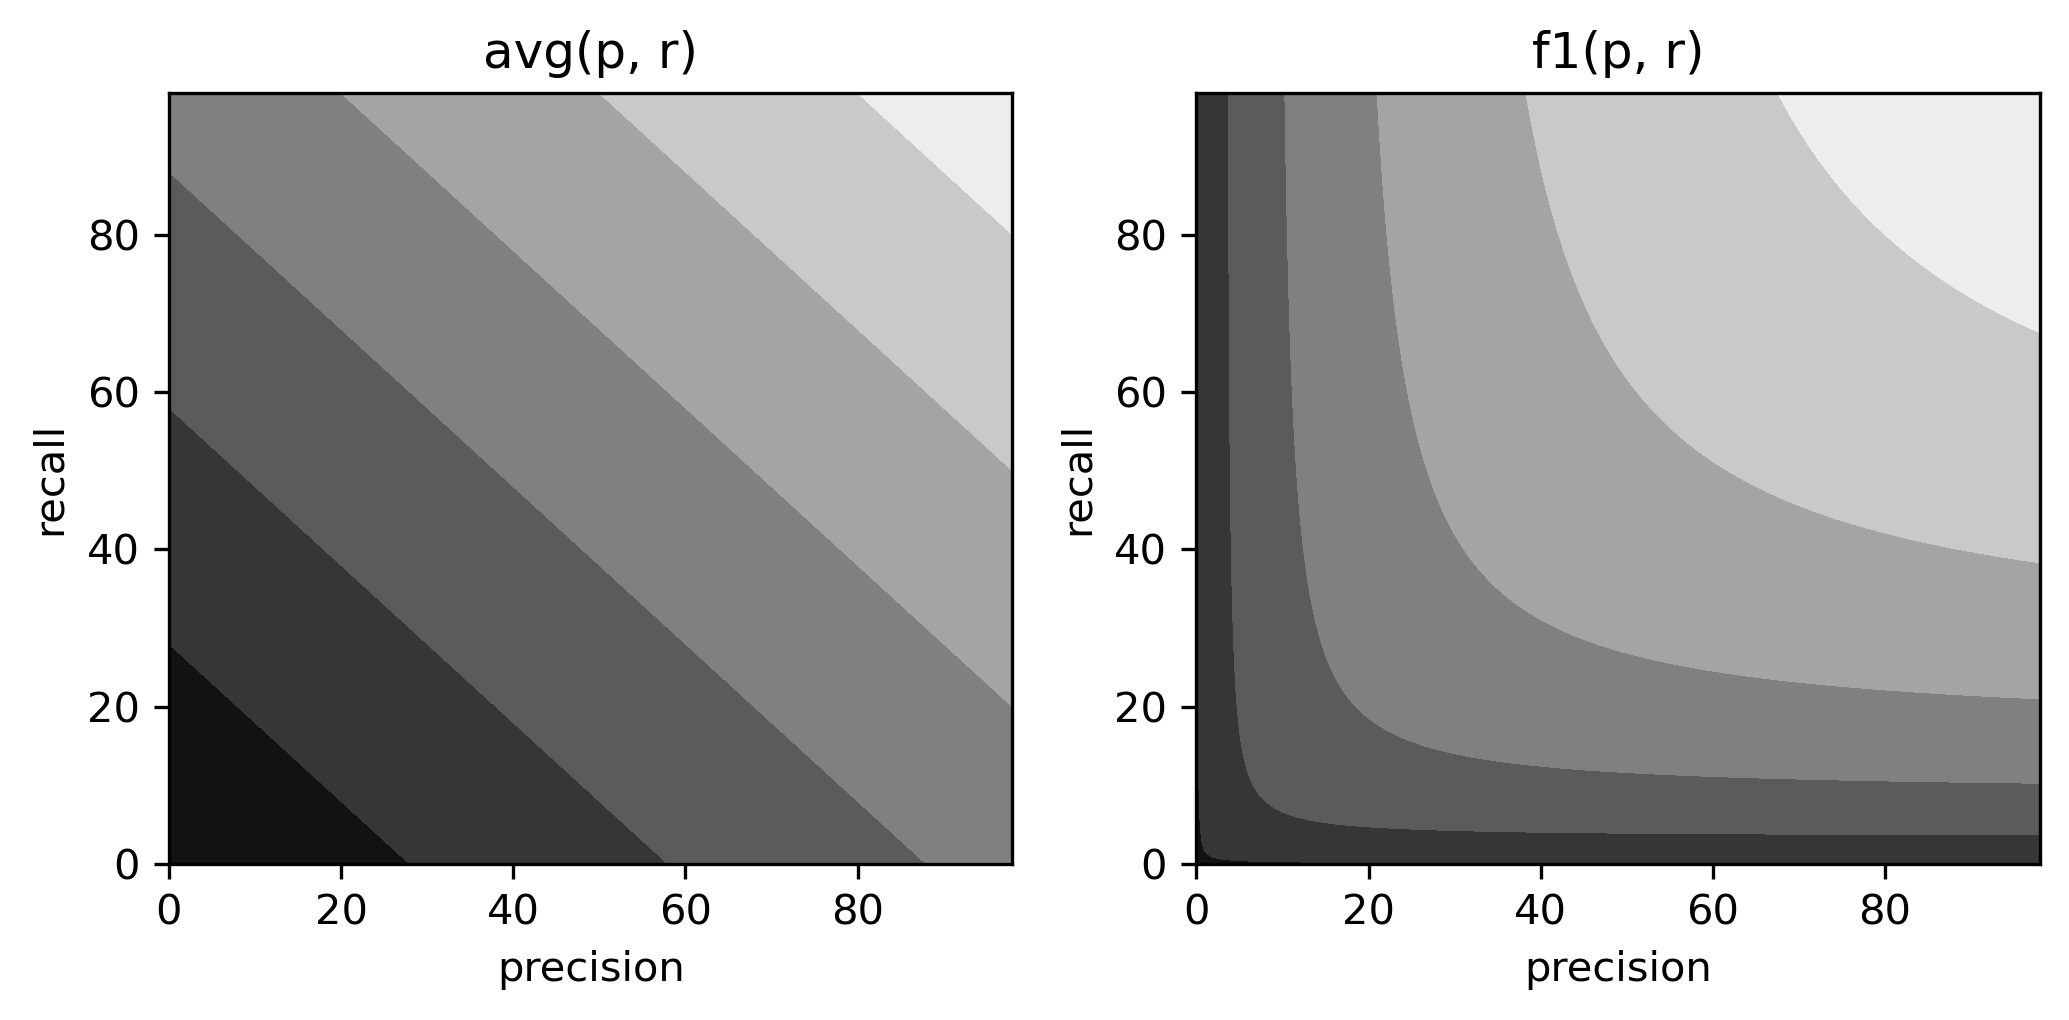

In [2]:
add_score = (precision_a + recall_a) / 2
plotScores("avg", add_score)

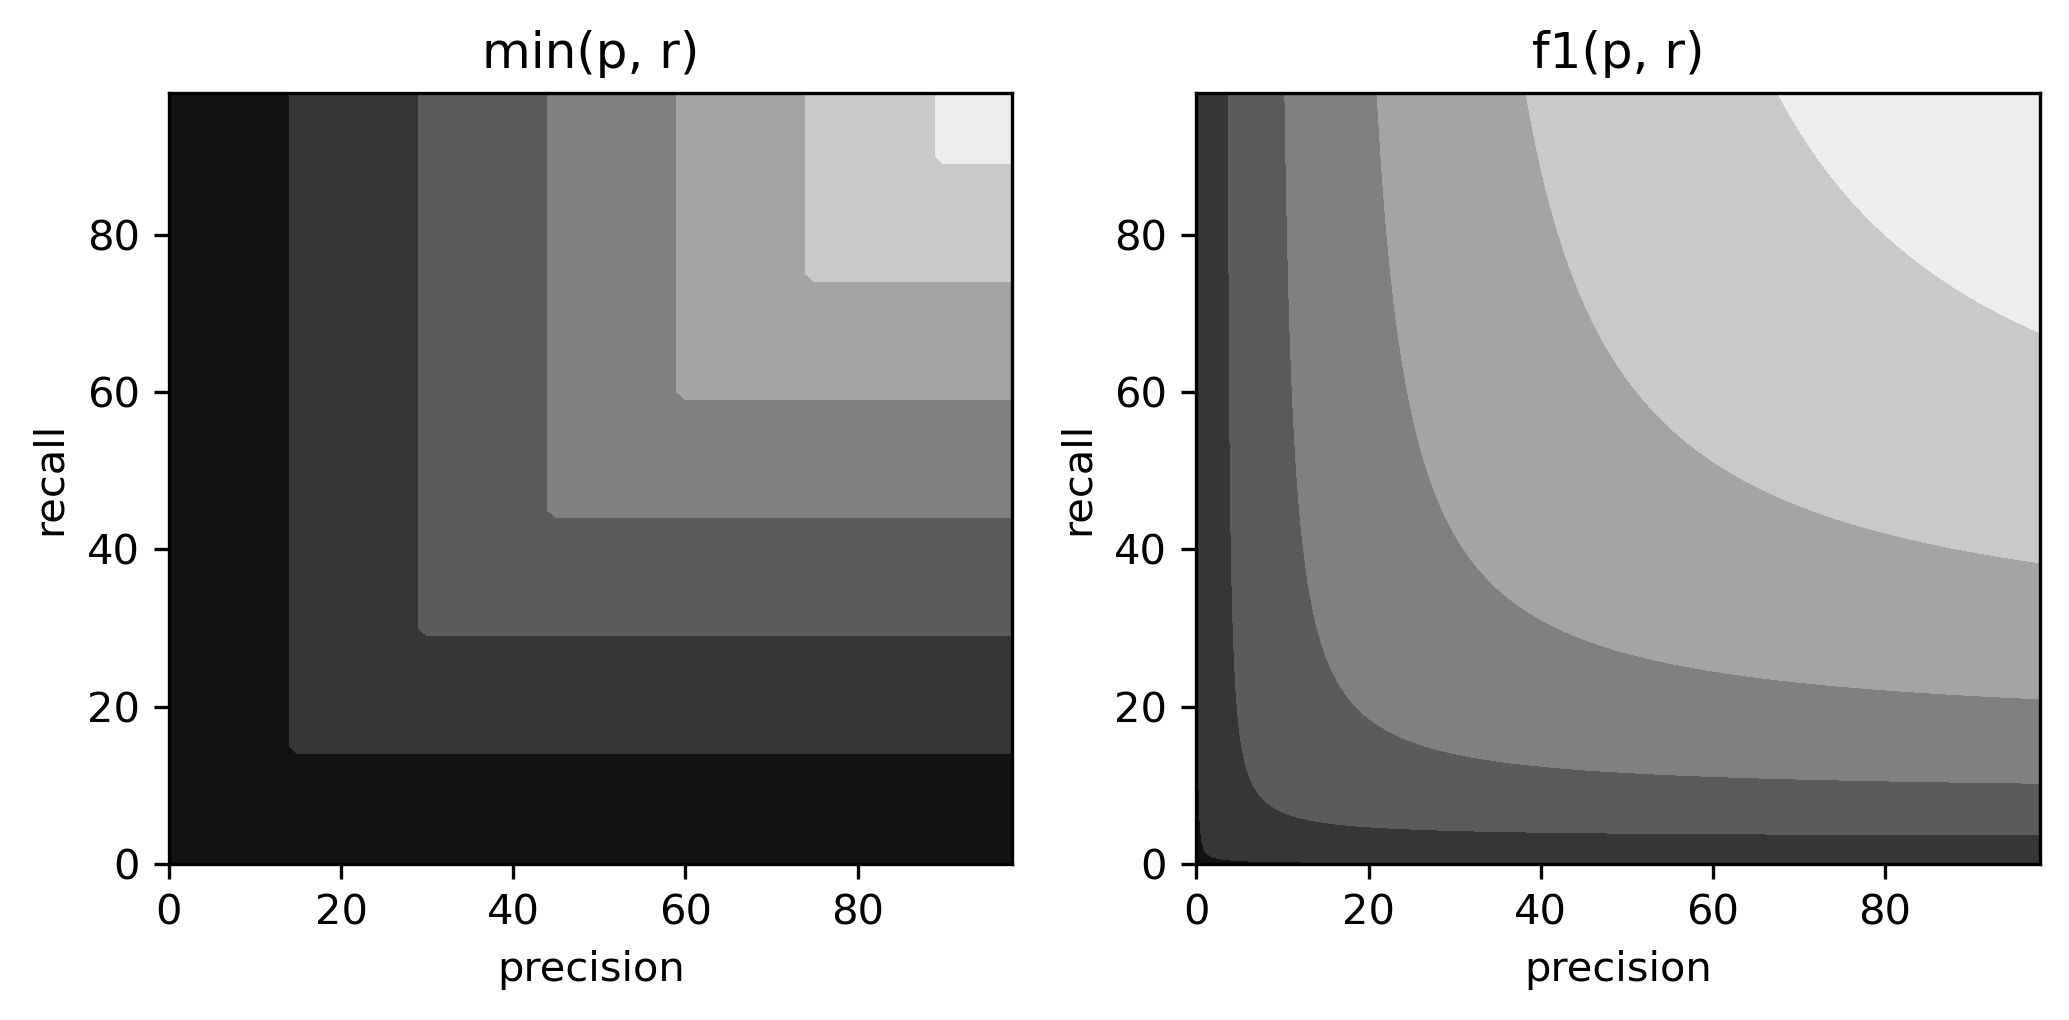

In [3]:
min_score = np.min(np.array([precision_a, recall_a]), axis=0)
plotScores("min", min_score)

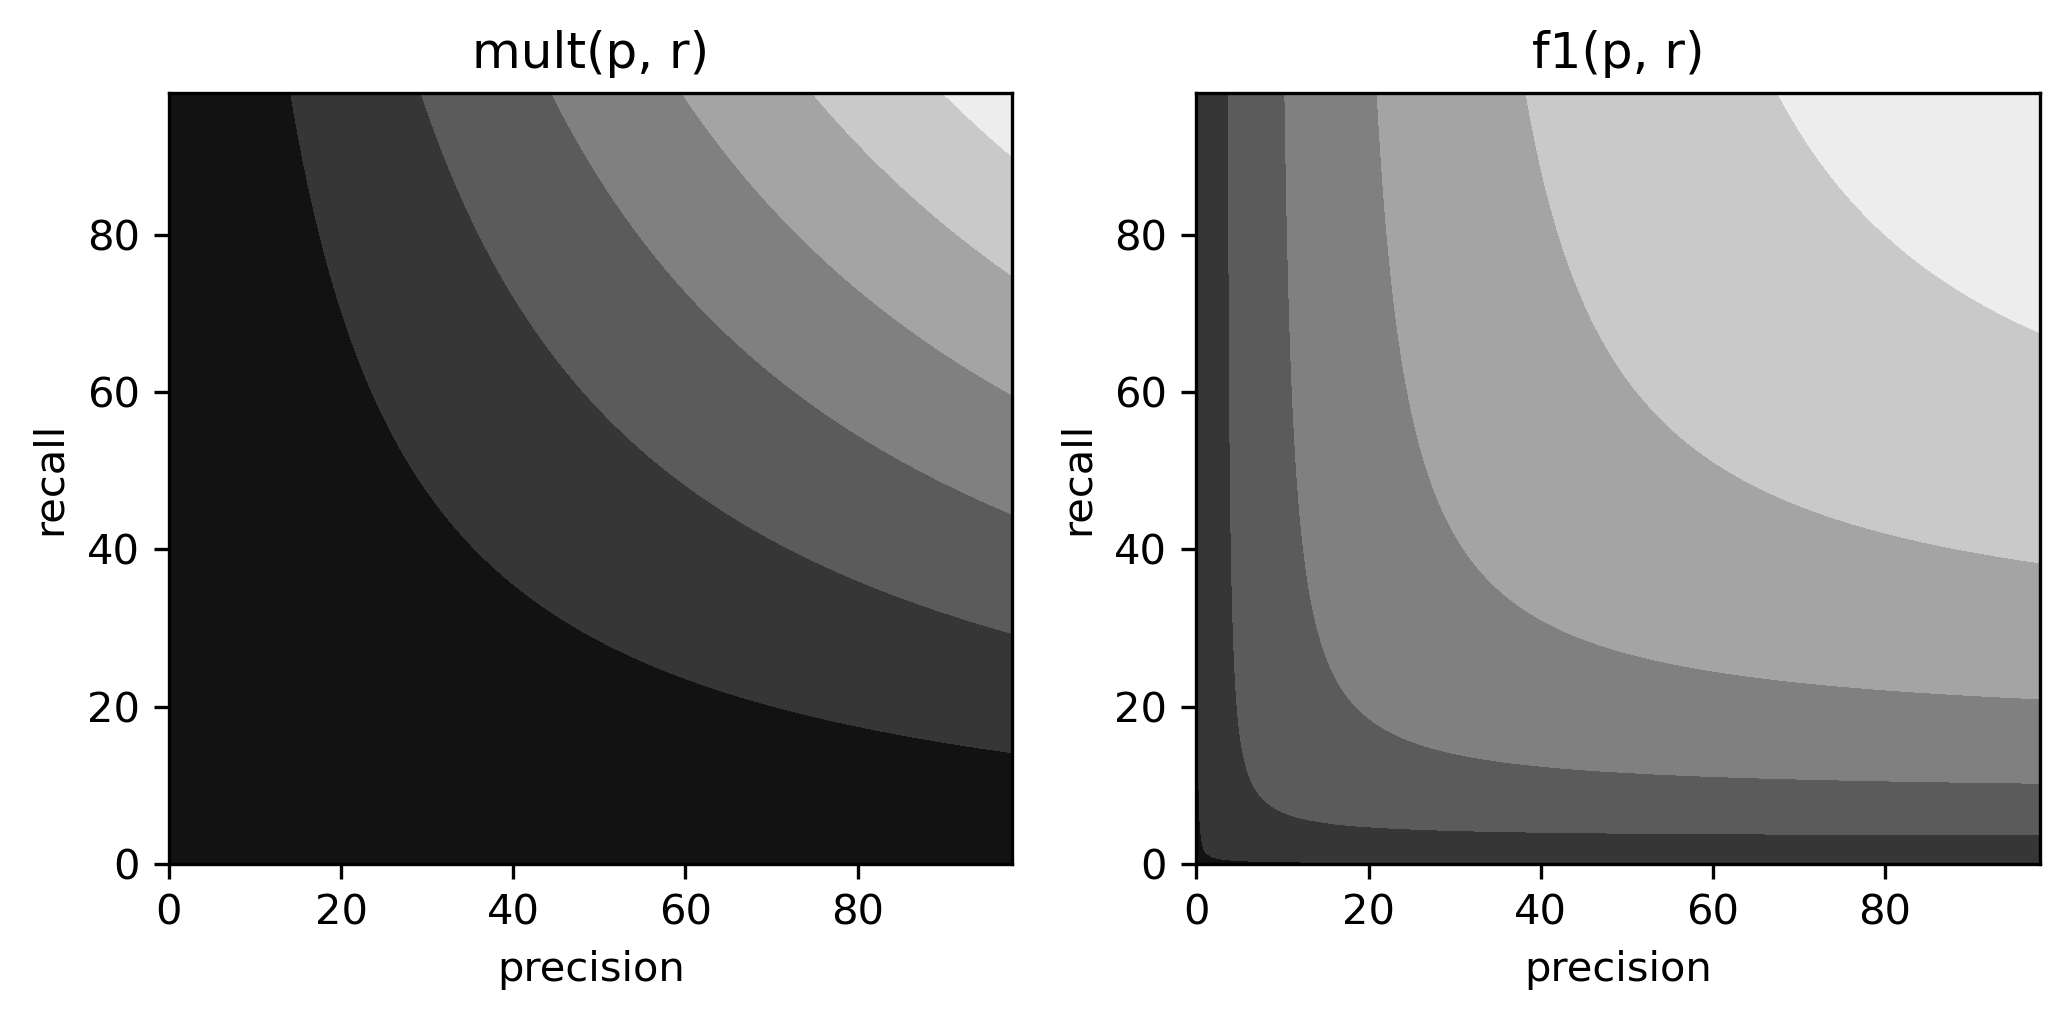

In [4]:
mult_score = precision_a * recall_a
plotScores("mult", mult_score)

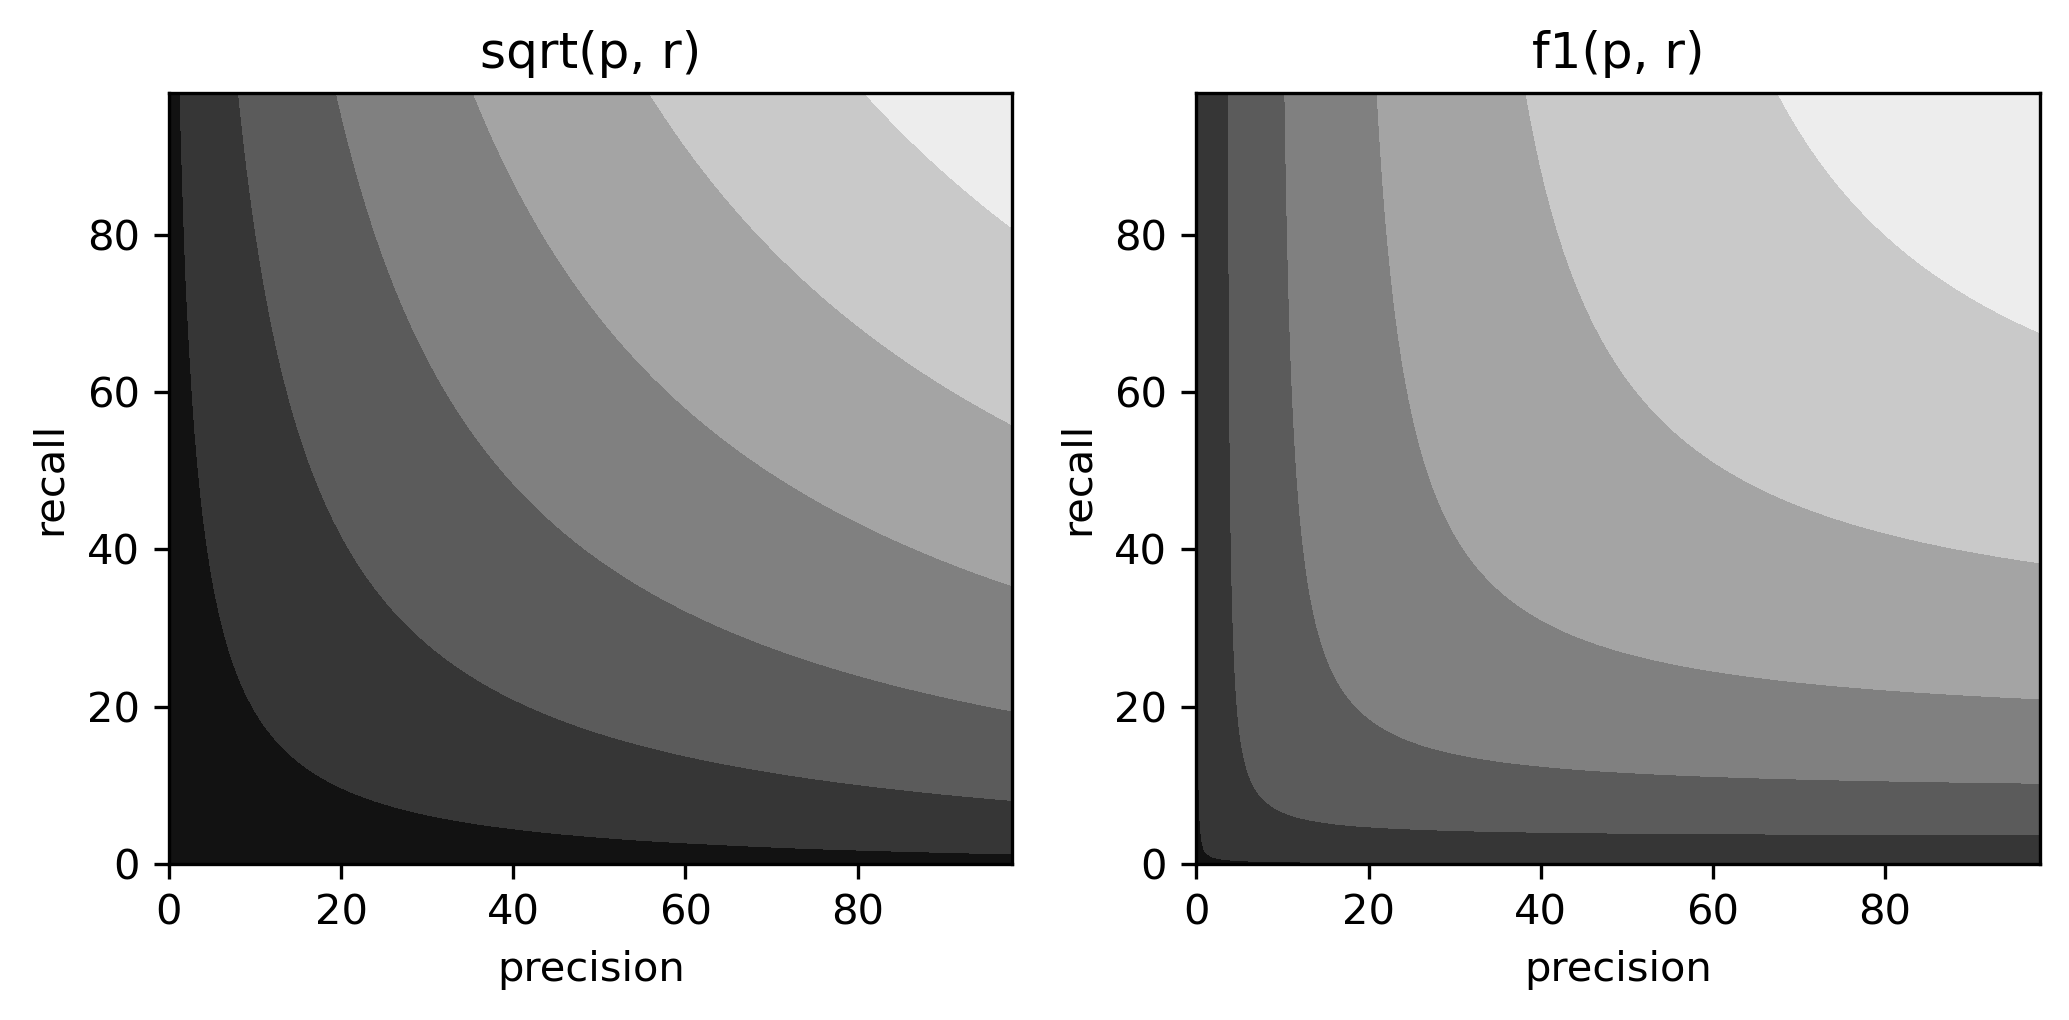

In [5]:
sqrt_score = np.sqrt(precision_a * recall_a)
plotScores("sqrt", sqrt_score)

### F1スコアの一般化 Fベータスコア
+ ベータの値が大きくなるほど再現率が重視されるようになる

In [8]:
# Fベータスコアとして一般化します。
# F2 スコアの場合は beta = 2.0
# F0.5 スコアの場合は beta = 0.5
# としてください
def fbeta_score(precision, recall, beta=1.0):
    return (1 + beta**2) * (precision*recall) / (beta**2*precision + recall)

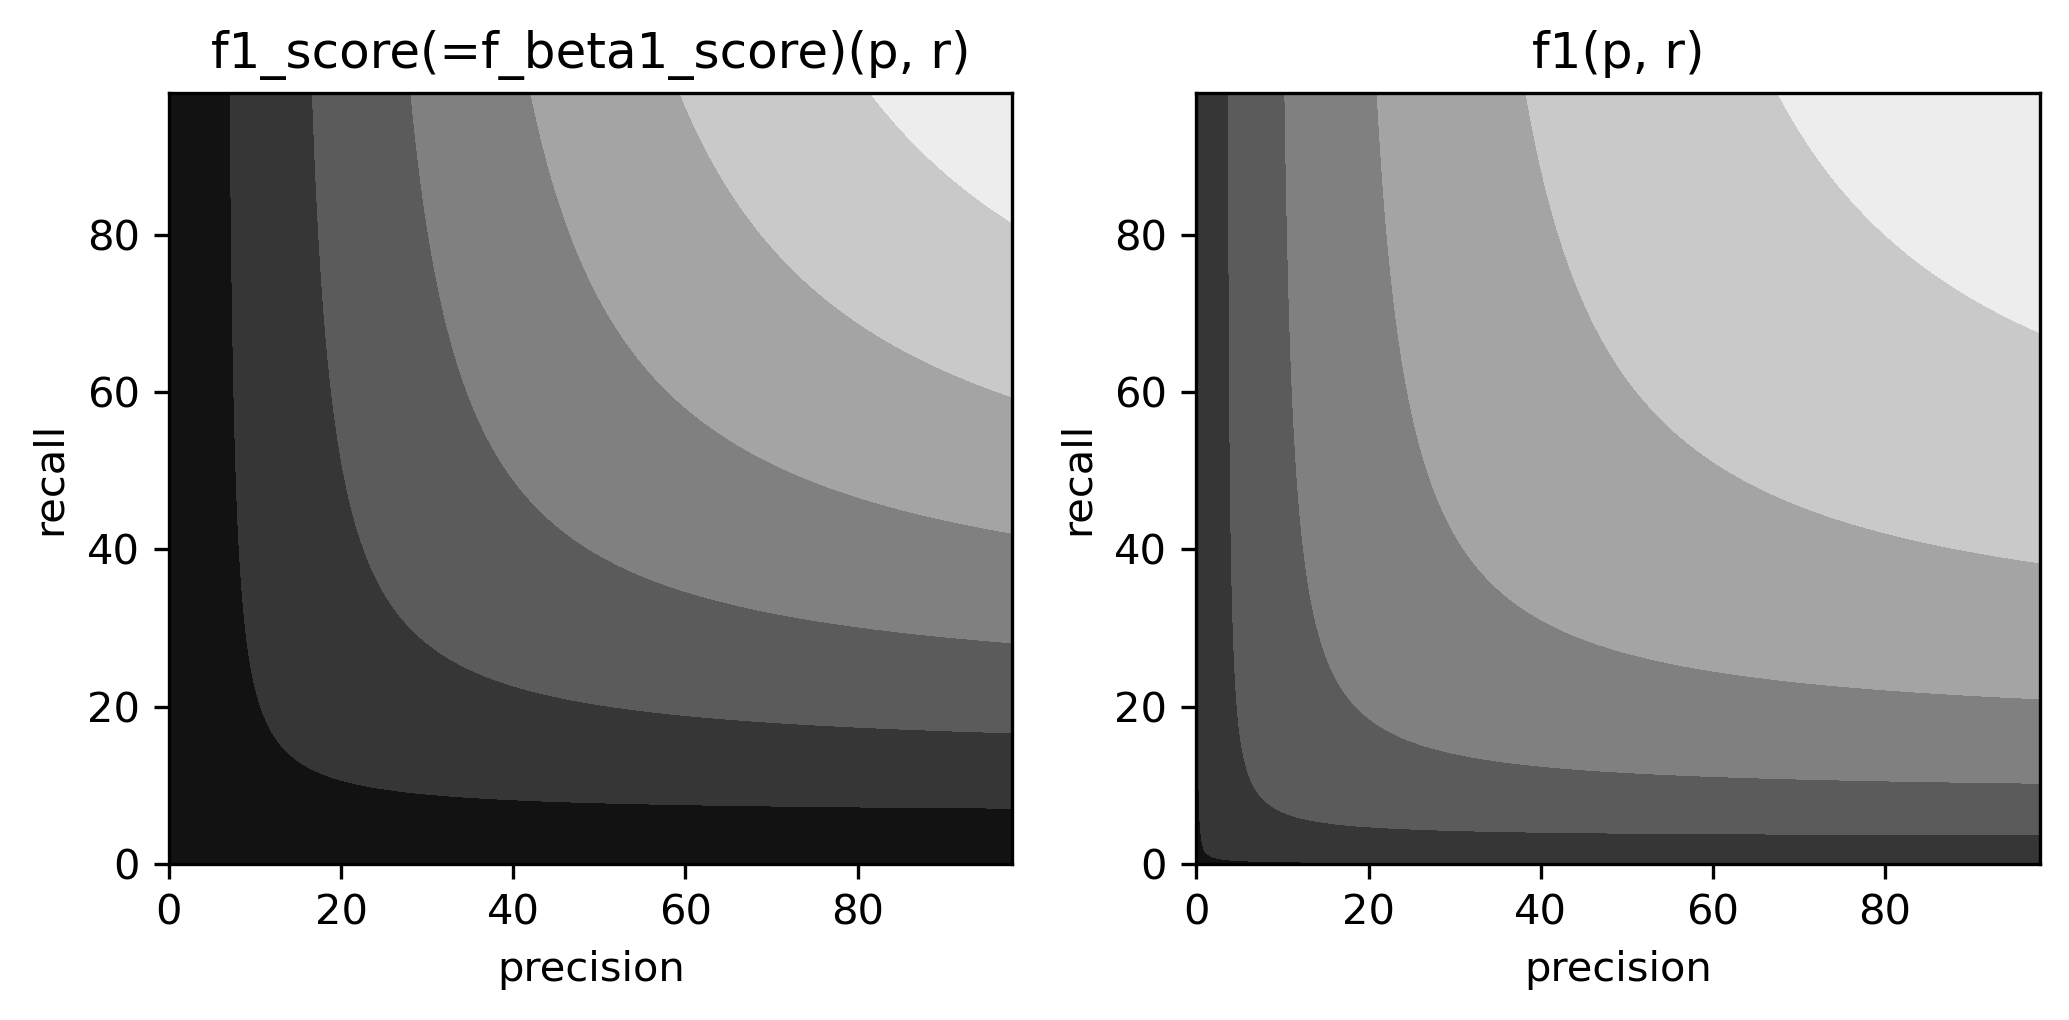

In [11]:
beta=1
f_beta_score = fbeta_score(precision_a, recall_a, beta)
plotScores(f"f{beta}_score(=f_beta{beta}_score)", f_beta_score)

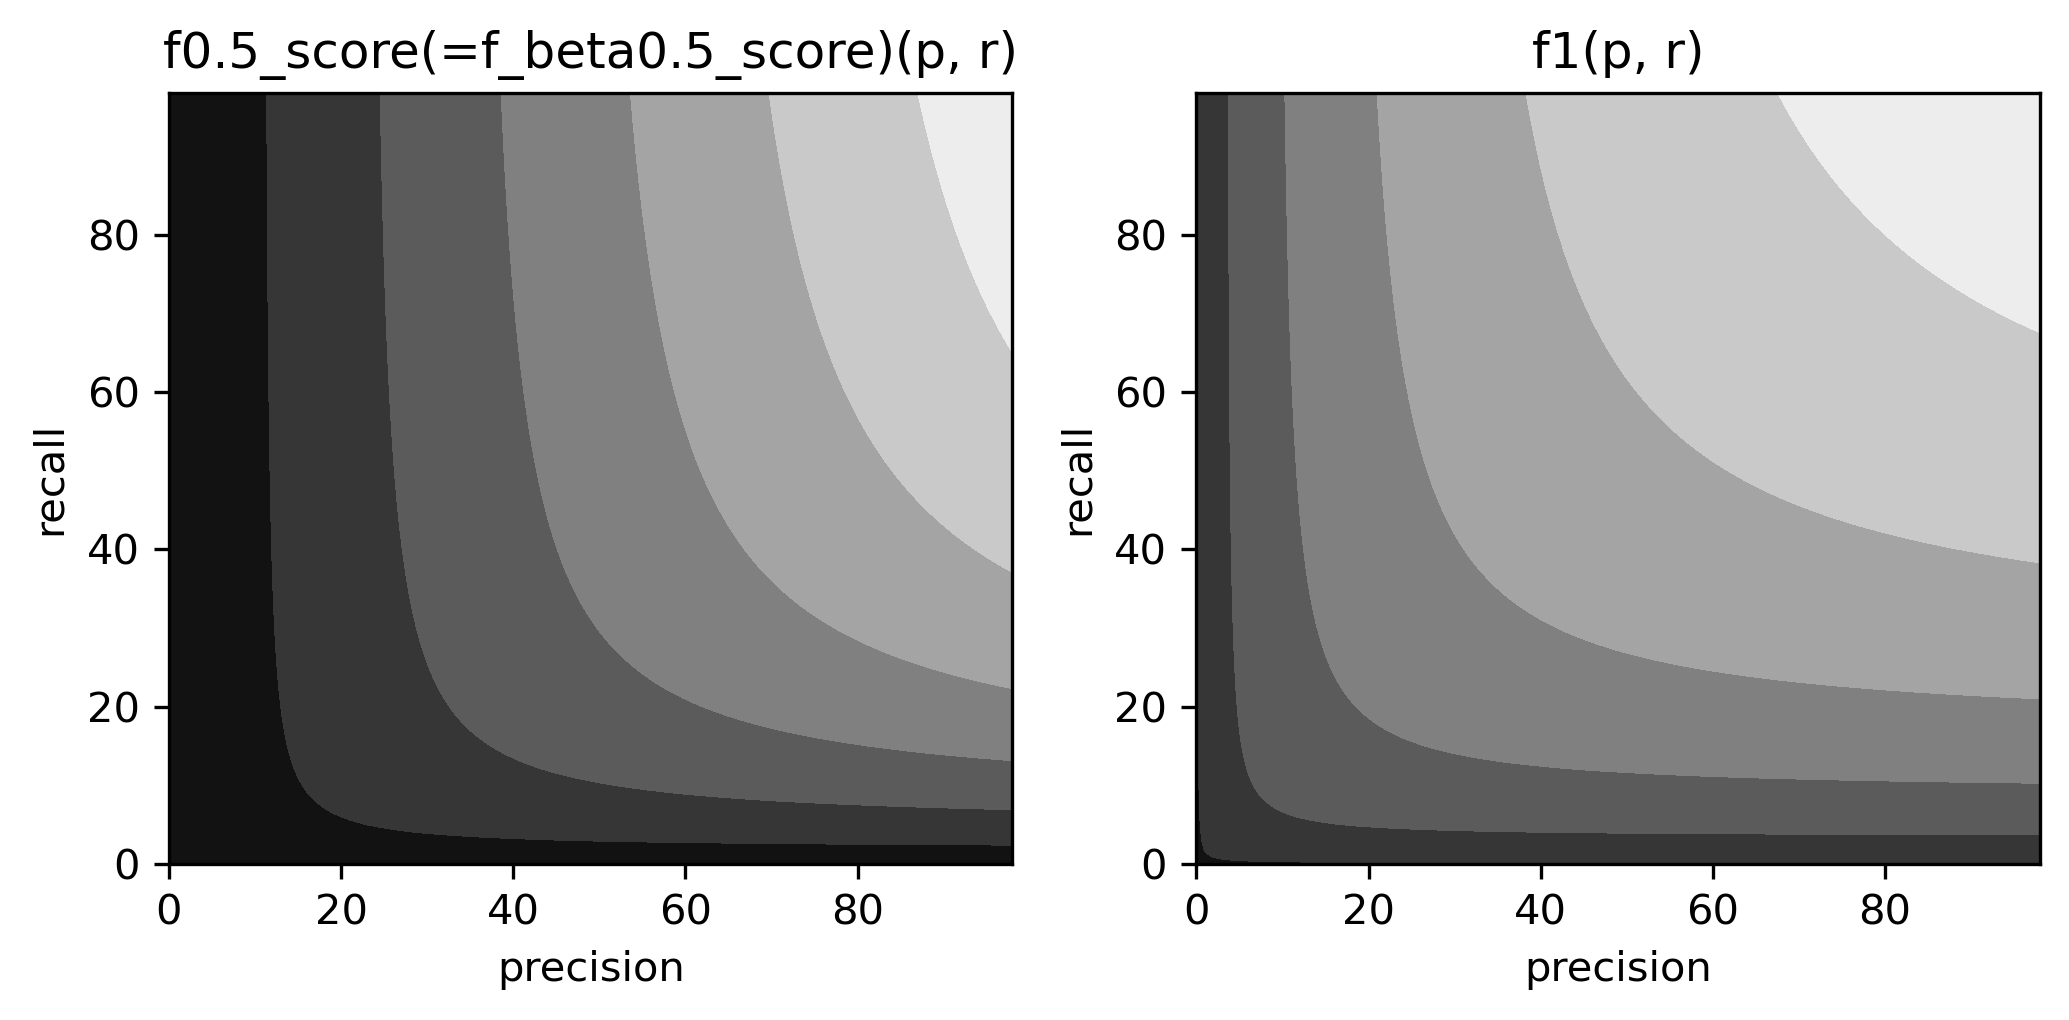

In [12]:
beta=0.5
f_beta_score = fbeta_score(precision_a, recall_a, beta)
plotScores(f"f{beta}_score(=f_beta{beta}_score)", f_beta_score)

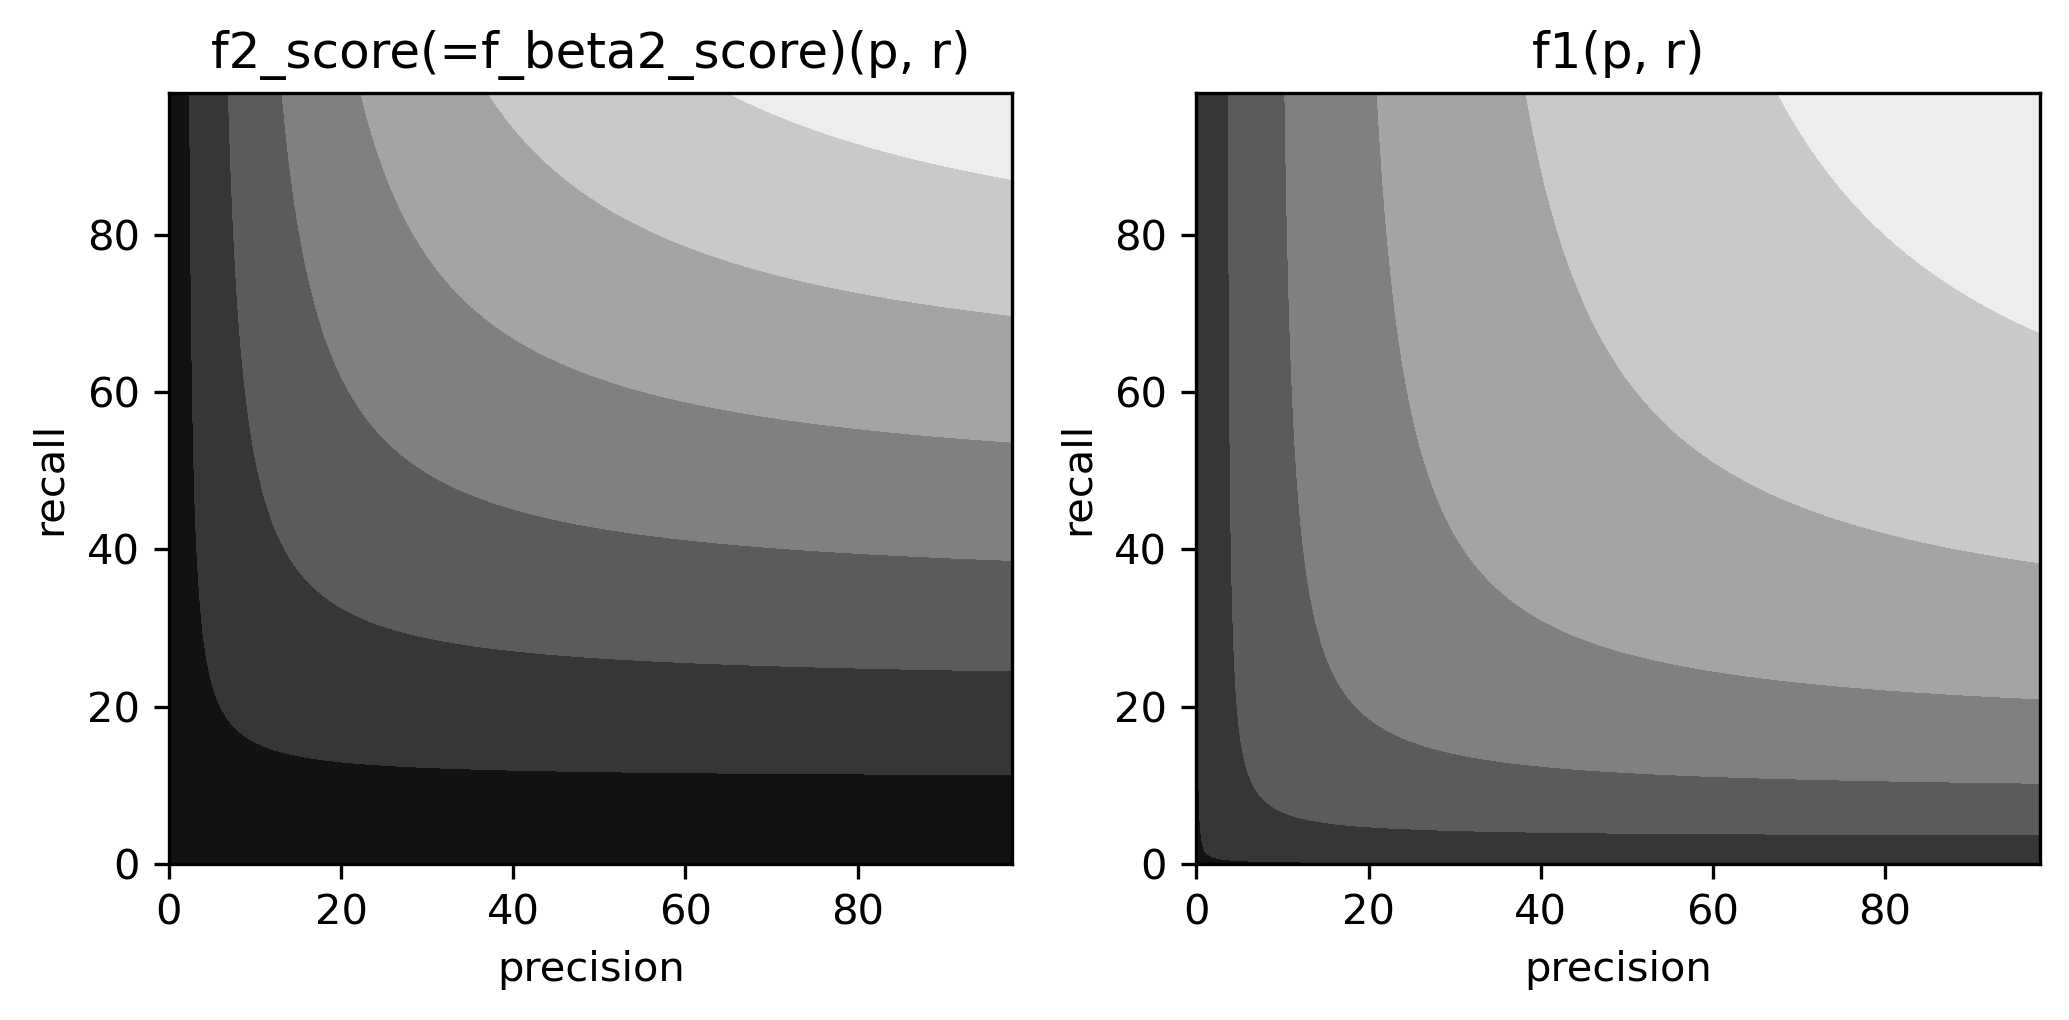

In [13]:
beta=2
f_beta_score = fbeta_score(precision_a, recall_a, beta)
plotScores(f"f{beta}_score(=f_beta{beta}_score)", f_beta_score)

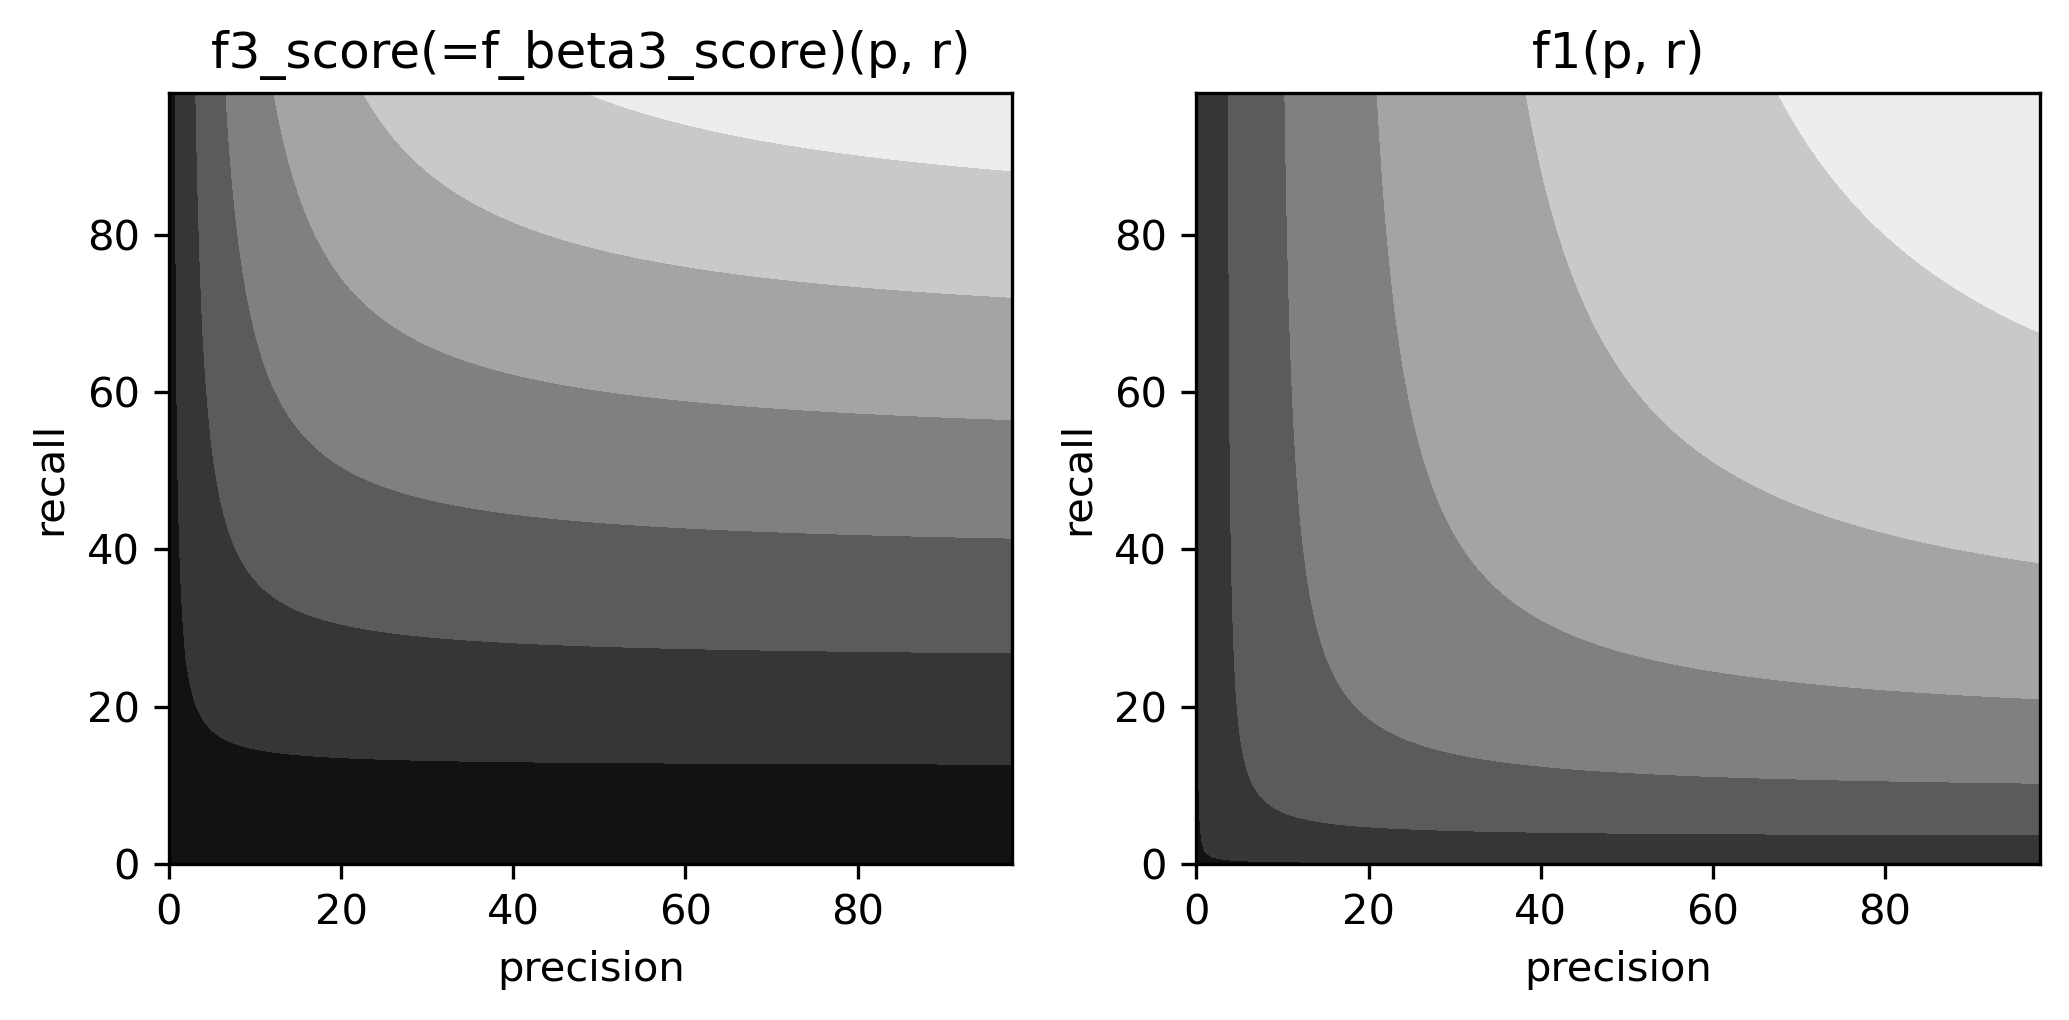

In [14]:
beta=3
f_beta_score = fbeta_score(precision_a, recall_a, beta)
plotScores(f"f{beta}_score(=f_beta{beta}_score)", f_beta_score)